<a href="https://colab.research.google.com/github/ritesh200tiwari/predict-price-of-house/blob/main/MinorProjForestFire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load libararies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline

In [ ]:
#load datasets
data = pd.read_csv('covtype.csv')
data.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,...,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,cover_type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
#list of columns
print(data.columns)

Index(['elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology',
       'vertical_distance_to_hydrology', 'horizontal_distance_to_roadways',
       'hillshade_9am', 'hillshade_noon', 'hillshade_3pm',
       'horizontal_distance_to_fire_points', 'wilderness_area_1',
       'wilderness_area_2', 'wilderness_area_3', 'wilderness_area_4',
       'soil_type_1', 'soil_type_2', 'soil_type_3', 'soil_type_4',
       'soil_type_5', 'soil_type_6', 'soil_type_7', 'soil_type_8',
       'soil_type_9', 'soil_type_10', 'soil_type_11', 'soil_type_12',
       'soil_type_13', 'soil_type_14', 'soil_type_15', 'soil_type_16',
       'soil_type_17', 'soil_type_18', 'soil_type_19', 'soil_type_20',
       'soil_type_21', 'soil_type_22', 'soil_type_23', 'soil_type_24',
       'soil_type_25', 'soil_type_26', 'soil_type_27', 'soil_type_28',
       'soil_type_29', 'soil_type_30', 'soil_type_31', 'soil_type_32',
       'soil_type_33', 'soil_type_34', 'soil_type_35', 'soil_type_36',
       'soil_type_37', '

In [ ]:
#shape of data
data.shape

(581012, 55)

In [ ]:
#check mising values
print(list(data.isnull().any()))

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [ ]:
data.describe()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,...,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,soil_type_40,cover_type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
#About Target/Cover_Type variable 
data.cover_type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: cover_type, dtype: int64

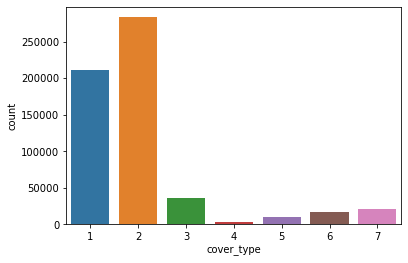

In [ ]:
#count plot of target
sb.countplot(x='cover_type', data=data)
plt.show()

In [ ]:
print(data.columns)

Index(['elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology',
       'vertical_distance_to_hydrology', 'horizontal_distance_to_roadways',
       'hillshade_9am', 'hillshade_noon', 'hillshade_3pm',
       'horizontal_distance_to_fire_points', 'wilderness_area_1',
       'wilderness_area_2', 'wilderness_area_3', 'wilderness_area_4',
       'soil_type_1', 'soil_type_2', 'soil_type_3', 'soil_type_4',
       'soil_type_5', 'soil_type_6', 'soil_type_7', 'soil_type_8',
       'soil_type_9', 'soil_type_10', 'soil_type_11', 'soil_type_12',
       'soil_type_13', 'soil_type_14', 'soil_type_15', 'soil_type_16',
       'soil_type_17', 'soil_type_18', 'soil_type_19', 'soil_type_20',
       'soil_type_21', 'soil_type_22', 'soil_type_23', 'soil_type_24',
       'soil_type_25', 'soil_type_26', 'soil_type_27', 'soil_type_28',
       'soil_type_29', 'soil_type_30', 'soil_type_31', 'soil_type_32',
       'soil_type_33', 'soil_type_34', 'soil_type_35', 'soil_type_36',
       'soil_type_37', '

In [ ]:
#Take some column
# col = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
#        'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
#        'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
#        'Horizontal_Distance_To_Fire_Points']
col = ['elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology',
       'vertical_distance_to_hydrology', 'horizontal_distance_to_roadways',
       'hillshade_9am', 'hillshade_noon', 'hillshade_3pm',
       'horizontal_distance_to_fire_points']

In [ ]:
train = data[col]

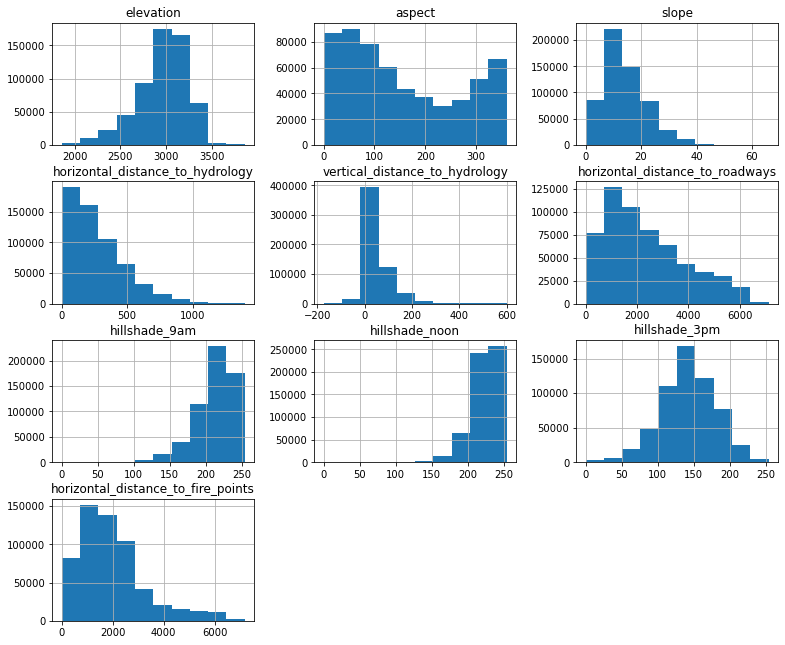

In [ ]:
#histogram
train.hist(figsize=(13, 11))
plt.show()

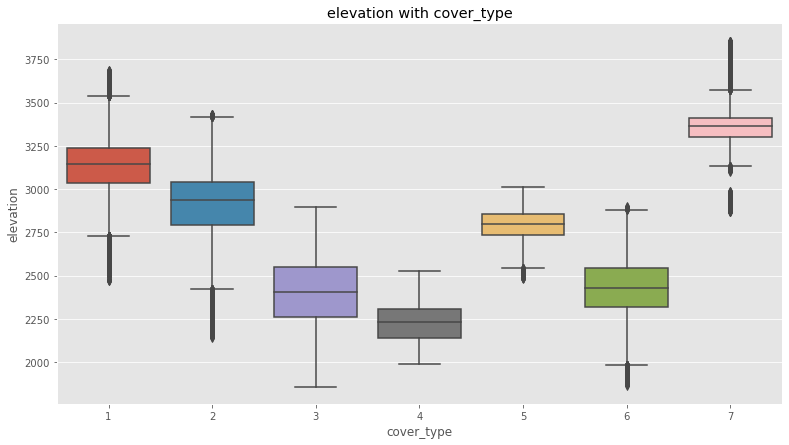

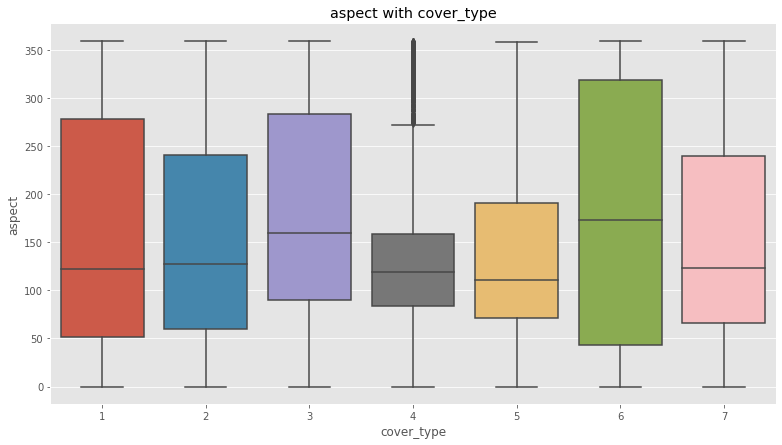

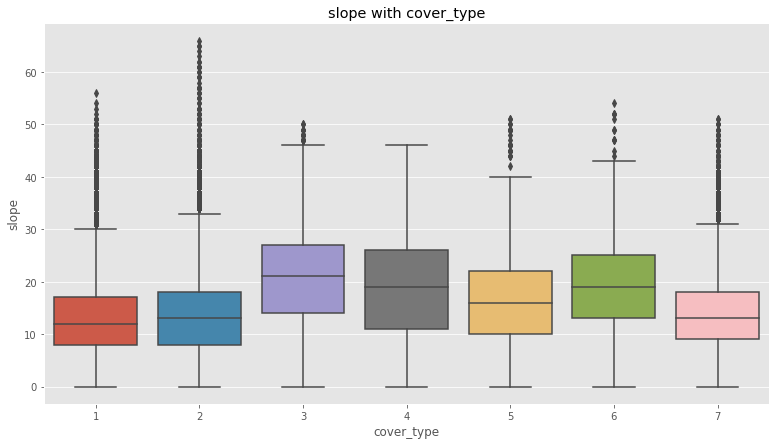

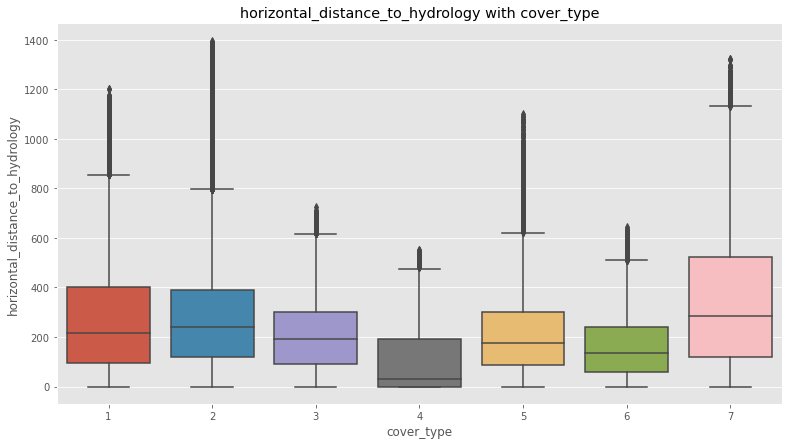

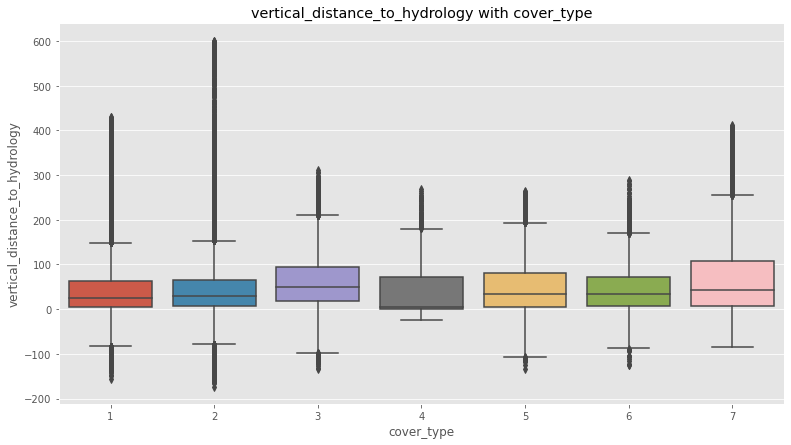

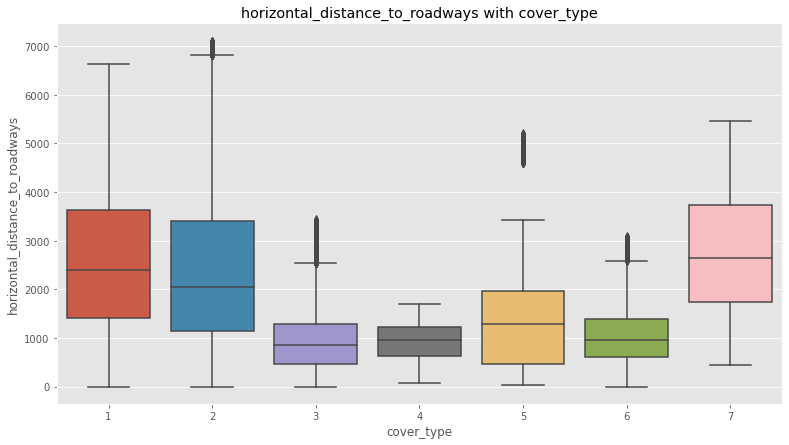

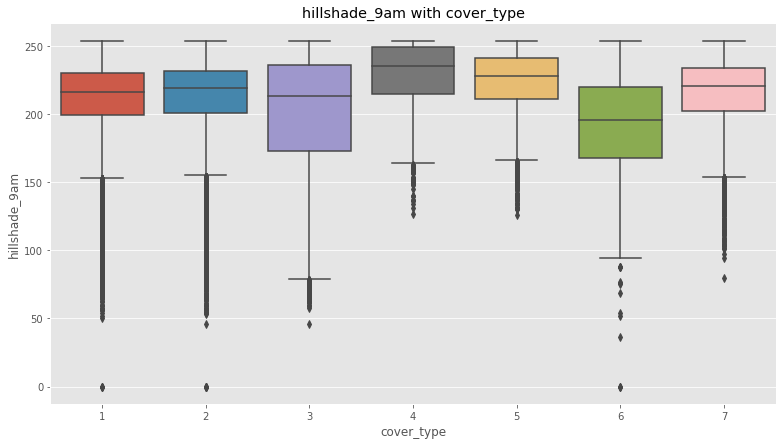

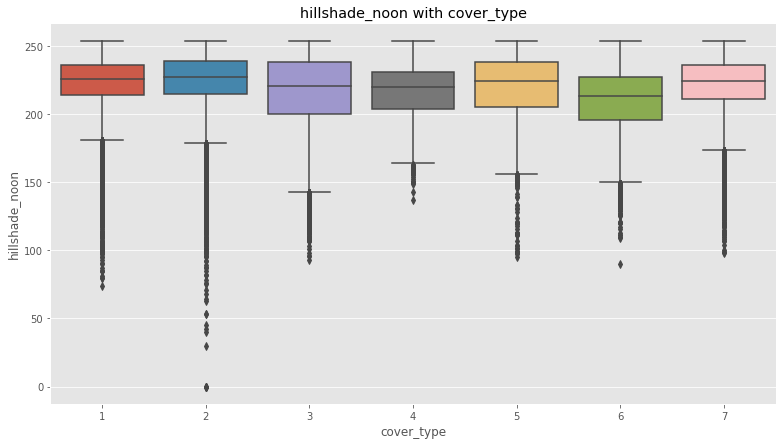

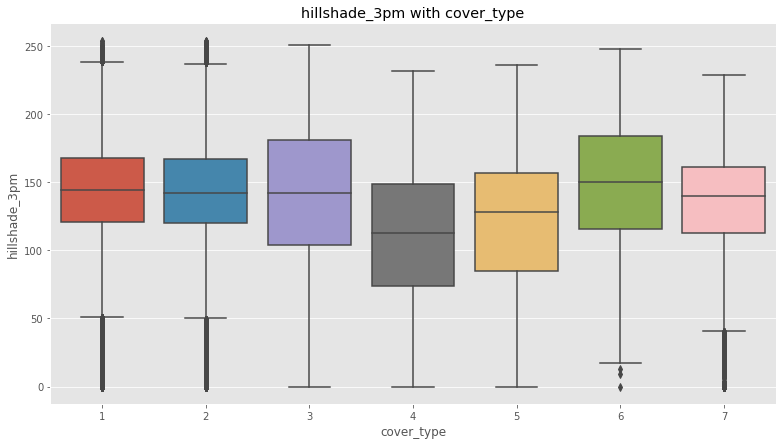

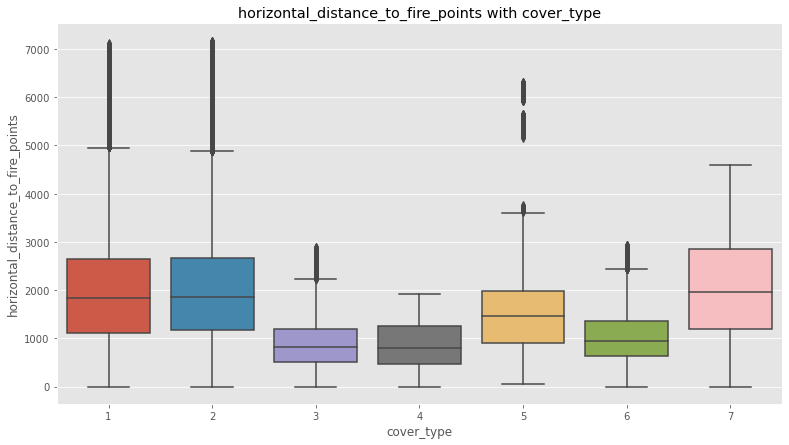

In [ ]:
#Boxplot
plt.style.use('ggplot')
for i in col:
    plt.figure(figsize=(13, 7))
    plt.title(str(i) + " with " + str('cover_type'))
    sb.boxplot(x=data.cover_type, y=train[i])
    plt.show()

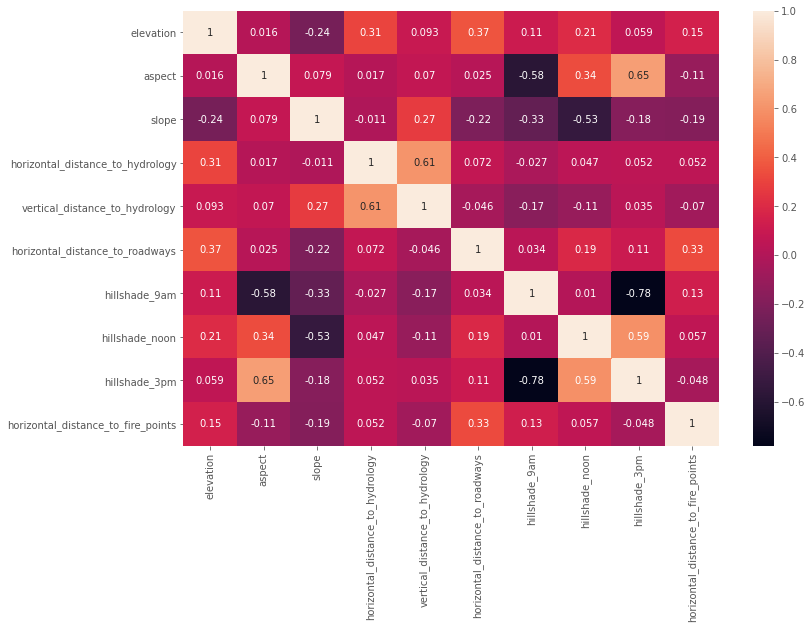

In [ ]:
#Corralation
plt.figure(figsize=(12, 8))
corr = train.corr()
sb.heatmap(corr, annot=True)
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

#separate features and target
feature = data.iloc[:, :54] #Features of data
y = data.iloc[:, 54]  #Target of data

# Features Reduction
ETC = ExtraTreesClassifier()
ETC = ETC.fit(feature, y)

model = SelectFromModel(ETC, prefit=True)
X = model.transform(feature) #new features

In [ ]:
#shape of new feature
X.shape

(581012, 12)

In [ ]:
#Split the data into test and train formate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

Accuracy --  94.79666512911955


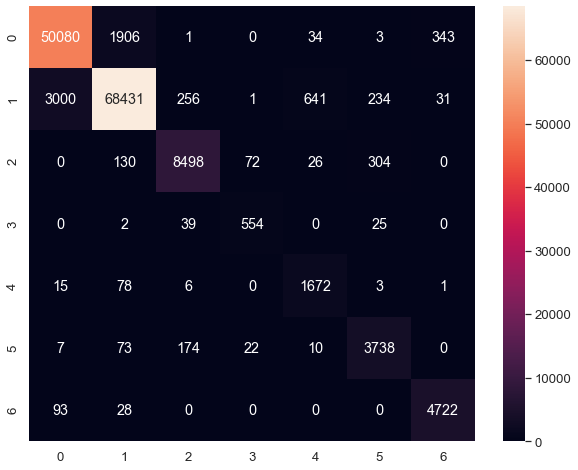

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100)

#fit
RFC.fit(X_train, y_train)

#prediction
y_pred = RFC.predict(X_test)

#score
print("Accuracy -- ", RFC.score(X_test, y_test)*100)

#confusion
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10, 8))
sb.set(font_scale=1.2)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()